In [1]:
# Importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
training_set = pd.read_excel("Food_Data_Train.xlsx")
test_set = pd.read_excel("Food_Data_Test.xlsx")

In [3]:
training_set.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test_set.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes



### Exploratory Data Analysis

In the below code blocks, we will perform an analysis on the given data.

    Checking the features in the Datasets
    Data Analysis :

    The training and test data are combined for further analysis.
    For the features TITLE and CUISINES we will identify the maximum number of items listed in a single cell and then split the features in to as many new features.
    If you observe the code below you will find that TITLE is split into two new columns TITLE1 and TITLE2. CUISINES is split into 8 different features.
    The NANs in the CITY and LOCALITY columns are replaced by "NOT AVAILABLE".
    Also the unique values in TITLE, CUISINES, CITY and LOALITY are identified which are to be used in encoding in the Data Preprocesing part.


In [5]:
# chechking the features in the Datasets

###############################################################################################################################################


#Training Set

print("\nEDA on Training Set\n")
print("#"*30)
print("\nFeatures/Columns : \n", training_set.columns)
print("\n\nNumber of Features/Columns : ", len(training_set.columns))
print("\nNumber of Rows : ",len(training_set))
print("\n\nData Types :\n", training_set.dtypes)
print("\nContains NaN/Empty cells : ", training_set.isnull().values.any())
print("\nTotal empty cells by column :\n", training_set.isnull().sum(), "\n\n")


# Test Set
print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)
print("\nFeatures/Columns : \n",test_set.columns)
print("\n\nNumber of Features/Columns : ",len(test_set.columns))
print("\nNumber of Rows : ",len(test_set))
print("\n\nData Types :\n", test_set.dtypes)
print("\nContains NaN/Empty cells : ", test_set.isnull().values.any())
print("\nTotal empty cells by column :\n", test_set.isnull().sum())


EDA on Training Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Number of Features/Columns :  9

Number of Rows :  12690


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Contains NaN/Empty cells :  True

Total empty cells by column :
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64 


##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dt

In [6]:
# Data Analysing

###############################################################################################################################################


#Combining trainig set and test sets for analysing data and finding patterns

data_temp = [training_set[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']], test_set]

data_temp = pd.concat(data_temp)


# Analysing Titles 

titles = list(data_temp['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)    

all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())

# Analysing cuisines 

cuisines = list(data_temp['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
         #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            #print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())

# Analysing CITY

all_cities = list(data_temp['CITY'])

for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())


# Cleaning LOCALITY

all_localities = list(data_temp['LOCALITY'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Maximum Titles in a Cell :  2


Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


Maximum cuisines in a Cell :  8


Number of Unique Cuisines :  130


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUI



Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


### Data Visualisation

#### Top 10 Titles.

Text(0.5, 1.0, 'TITLE')

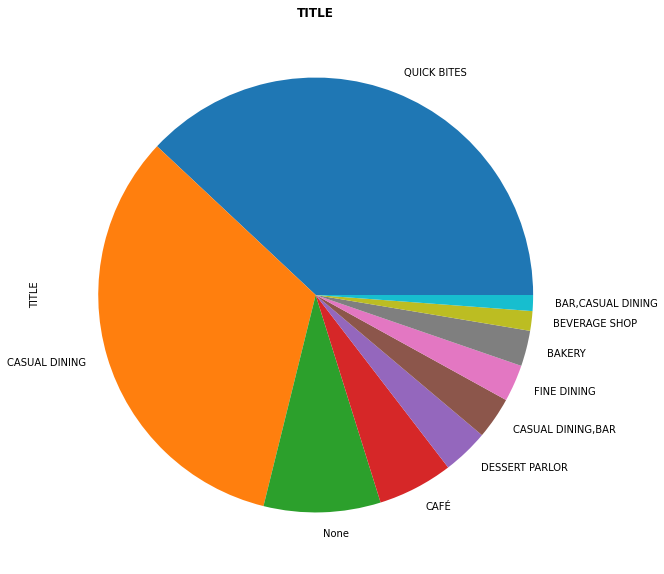

In [7]:
plt.figure(figsize=(10,10))
ax =data_temp.TITLE.value_counts()[:10].plot(kind='pie')
plt.title('TITLE', weight='bold')


Text(0, 0.5, 'counts')

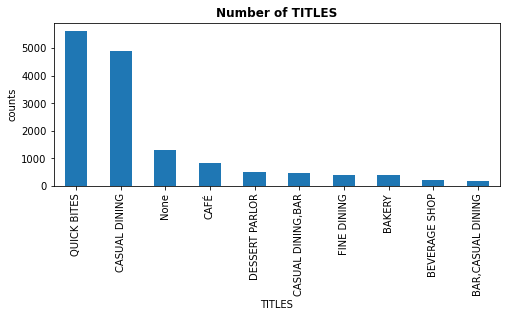

In [8]:
plt.figure(figsize=(8,3))
ax =data_temp.TITLE.value_counts()[:10].plot(kind='bar')
plt.title('Number of TITLES', weight='bold')
plt.xlabel('TITLES')
plt.ylabel('counts')

The top 10 Titles is shown in the above pie chart and bar.

#### Top 10 Ratings.

Text(0.5, 1.0, 'Rating')

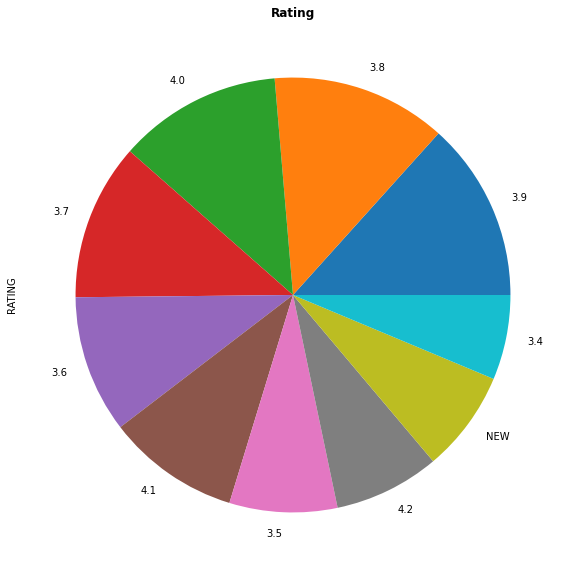

In [9]:
plt.figure(figsize=(10,10))
ax =data_temp.RATING.value_counts()[:10].plot(kind='pie')
plt.title('Rating', weight='bold')

Text(0, 0.5, 'counts')

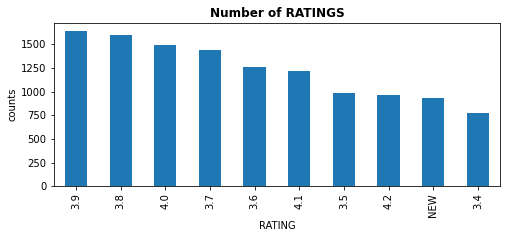

In [10]:
plt.figure(figsize=(8,3))
ax =data_temp.RATING.value_counts()[:10].plot(kind='bar')
plt.title('Number of RATINGS', weight='bold')
plt.xlabel('RATING')
plt.ylabel('counts')

#### Top 10 Cities.

Text(0.5, 1.0, 'CITY')

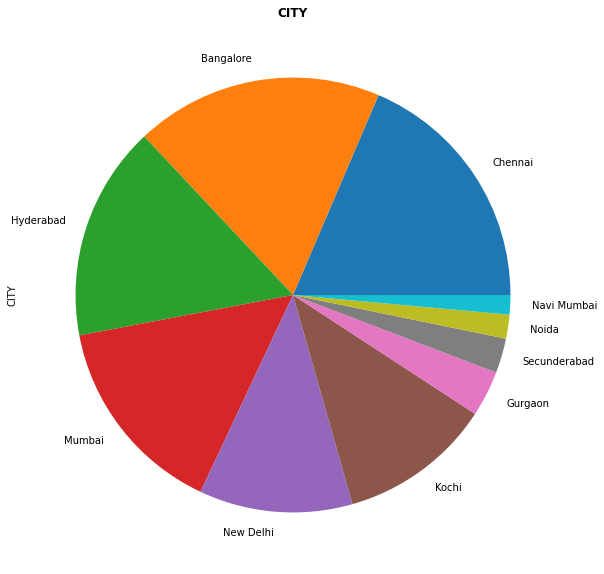

In [11]:
plt.figure(figsize=(10,10))
ax =data_temp.CITY.value_counts()[:10].plot(kind='pie')
plt.title('CITY', weight='bold')

Text(0, 0.5, 'counts')

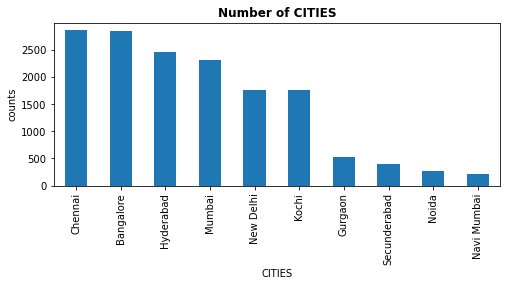

In [12]:
plt.figure(figsize=(8,3))
ax =data_temp.CITY.value_counts()[:10].plot(kind='bar')
plt.title('Number of CITIES', weight='bold')
plt.xlabel('CITIES')
plt.ylabel('counts')

#### Top 10 CUISINES.

Text(0.5, 1.0, 'CUISINES')

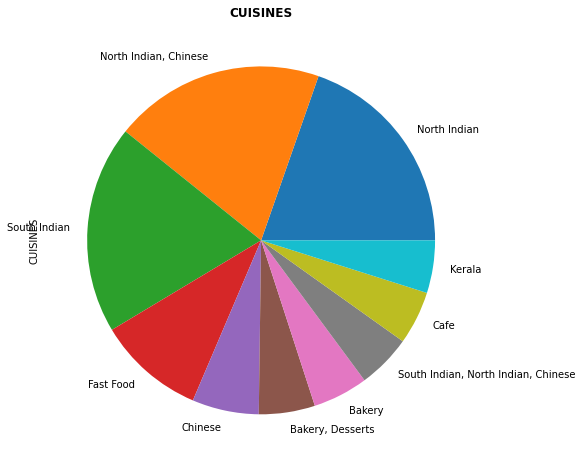

In [13]:
plt.figure(figsize=(8,8))
ax =data_temp.CUISINES.value_counts()[:10].plot(kind='pie')
plt.title('CUISINES', weight='bold')

Text(0, 0.5, 'counts')

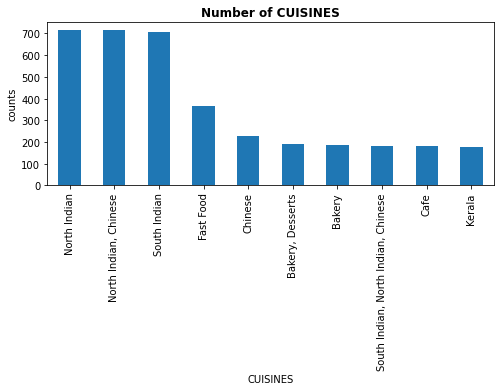

In [14]:
plt.figure(figsize=(8,3))
ax =data_temp.CUISINES.value_counts()[:10].plot(kind='bar')
plt.title('Number of CUISINES', weight='bold')
plt.xlabel('CUISINES')
plt.ylabel('counts')


### Data Cleaning

After the analysis we will proceed to cleaning the training and test sets.

You will find some of the steps are same as we did in the Data Analysis part above. In Data Analysis part we created a temporary data set just to analyze the data, in the below codeblock however we are appliying it in the training and test sets.

The following steps are performed for bot training_set and test_set

    Splitting TITLE and CUISINES in to new feature sets and replacing NANs/empty cells with text "NONE" .
    Replacing NANs in CITY and LOCALITY with text "NOT AVAILABLE"
    Converting RATING type to float
    Cleaning the VOTES column and converting it to integers.
    The cleaned features are stored to a new dataset.(new_data_train & new_data_test)



In [15]:
###############################################################################################################################################

# Data Cleaning

###############################################################################################################################################


# Cleaning Training Set
#______________________

# TITLE


titles = list(training_set['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

#Cleaning CUISINES 

cuisines = list(training_set['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

# Cleaning CITY

cities = list(training_set['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
        

# Cleaning LOCALITY

localities = list(training_set['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()   
    

#Cleaning Rating

rates = list(training_set['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan


# Votes
       
votes = list(training_set['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass       
    
    

new_data_train = {}

new_data_train['TITLE1'] = T1
new_data_train['TITLE2'] = T2
new_data_train['RESTAURANT_ID'] = training_set["RESTAURANT_ID"]
new_data_train['CUISINE1'] = C1
new_data_train['CUISINE2'] = C2
new_data_train['CUISINE3'] = C3
new_data_train['CUISINE4'] = C4
new_data_train['CUISINE5'] = C5
new_data_train['CUISINE6'] = C6
new_data_train['CUISINE7'] = C7
new_data_train['CUISINE8'] = C8
new_data_train['CITY'] = cities
new_data_train['LOCALITY'] = localities
new_data_train['RATING'] = rates
new_data_train['VOTES'] = votes
new_data_train['COST'] = training_set["COST"]

new_data_train = pd.DataFrame(new_data_train)
#______________________



#______________________
# Cleaning Test Set
#______________________

# TITLE

titles = list(test_set['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')


#Cleaning CUISINES 

cuisines = list(test_set['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 we will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')


# Cleaning CITY

cities = list(test_set['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
        

# Cleaning LOCALITY

localities = list(test_set['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()   
    

#Cleaning Rating

rates = list(test_set['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan


# Votes
       
votes = list(test_set['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass       
    
    

new_data_test = {}

new_data_test['TITLE1'] = T1
new_data_test['TITLE2'] = T2
new_data_test['RESTAURANT_ID'] = test_set["RESTAURANT_ID"]
new_data_test['CUISINE1'] = C1
new_data_test['CUISINE2'] = C2
new_data_test['CUISINE3'] = C3
new_data_test['CUISINE4'] = C4
new_data_test['CUISINE5'] = C5
new_data_test['CUISINE6'] = C6
new_data_test['CUISINE7'] = C7
new_data_test['CUISINE8'] = C8
new_data_test['CITY'] = cities
new_data_test['LOCALITY'] = localities
new_data_test['RATING'] = rates
new_data_test['VOTES'] = votes

new_data_test = pd.DataFrame(new_data_test)

print("\n\nnew_data_train: \n", new_data_train.head())
print("\n\nnew_data_test: \n", new_data_test.head())

#______________________



new_data_train: 
            TITLE1 TITLE2  RESTAURANT_ID      CUISINE1       CUISINE2  \
0   CASUAL DINING   NONE           9438       MALWANI           GOAN   
1   CASUAL DINING    BAR          13198         ASIAN  MODERN INDIAN   
2   CASUAL DINING   NONE          10915  NORTH INDIAN        CHINESE   
3     QUICK BITES   NONE           6346       TIBETAN        CHINESE   
4  DESSERT PARLOR   NONE          15387      DESSERTS           NONE   

       CUISINE3    CUISINE4 CUISINE5 CUISINE6 CUISINE7 CUISINE8     CITY  \
0  NORTH INDIAN        NONE     NONE     NONE     NONE     NONE    THANE   
1      JAPANESE        NONE     NONE     NONE     NONE     NONE  CHENNAI   
2       BIRYANI  HYDERABADI     NONE     NONE     NONE     NONE  CHENNAI   
3          NONE        NONE     NONE     NONE     NONE     NONE   MUMBAI   
4          NONE        NONE     NONE     NONE     NONE     NONE   MUMBAI   

         LOCALITY  RATING  VOTES  COST  
0  DOMBIVALI EAST     3.6   49.0  1200  
1       


### Data Preprocessing

The below code deals with the following tasks:

    Dealing with missing values
    Encoding categorical features
    Feature Scaling



In [16]:
###############################################################################################################################################

# Data Preprocessing

###############################################################################################################################################

# Missing Values
#_______________

# Training Set

print("\n\nMissing Values in Training Set\n","#"*60)
print("\nContains NaN/Empty cells : ", new_data_train.isnull().values.any())
print("\nTotal empty cells by column\n","_"*60,"\n", new_data_train.isnull().sum())

new_data_train.fillna(0, inplace = True)

print("\n\nAfter Filling 0:\n","_"*60,"\n")
print("\nContains NaN/Empty cells : ", new_data_train.isnull().values.any())

# Test Set

print("\n\nMissing Values in Test Set \n","#"*60)
print("\nContains NaN/Empty cells : ", new_data_test.isnull().values.any())
print("\nTotal empty cells by column\n","_"*60,"\n", new_data_test.isnull().sum())


new_data_test.fillna(0, inplace = True)

print("\n\nAfter Filling 0 :\n","_"*60,"\n")
print("\nContains NaN/Empty cells : ", new_data_test.isnull().values.any())
print("\n\n")


# Encoding Categorical Variables
#_______________________________


from sklearn.preprocessing import LabelEncoder

le_titles = LabelEncoder()
le_cuisines = LabelEncoder()

le_city = LabelEncoder()

le_locality = LabelEncoder()


le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)

le_city.fit(all_cities)
le_locality.fit(all_localities)



# Training Set  

new_data_train['TITLE1'] = le_titles.transform(new_data_train['TITLE1'])
new_data_train['TITLE2'] = le_titles.transform(new_data_train['TITLE2'])


new_data_train['CUISINE1'] = le_cuisines.transform(new_data_train['CUISINE1'])
new_data_train['CUISINE2'] = le_cuisines.transform(new_data_train['CUISINE2'])
new_data_train['CUISINE3'] = le_cuisines.transform(new_data_train['CUISINE3'])
new_data_train['CUISINE4'] = le_cuisines.transform(new_data_train['CUISINE4'])
new_data_train['CUISINE5'] = le_cuisines.transform(new_data_train['CUISINE5'])
new_data_train['CUISINE6'] = le_cuisines.transform(new_data_train['CUISINE6'])
new_data_train['CUISINE7'] = le_cuisines.transform(new_data_train['CUISINE7'])
new_data_train['CUISINE8'] = le_cuisines.transform(new_data_train['CUISINE8'])


new_data_train['CITY'] = le_city.transform(new_data_train['CITY'])
new_data_train['LOCALITY'] = le_locality.transform(new_data_train['LOCALITY'])

# Test Set

new_data_test['TITLE1'] = le_titles.transform(new_data_test['TITLE1'])
new_data_test['TITLE2'] = le_titles.transform(new_data_test['TITLE2'])


new_data_test['CUISINE1'] = le_cuisines.transform(new_data_test['CUISINE1'])
new_data_test['CUISINE2'] = le_cuisines.transform(new_data_test['CUISINE2'])
new_data_test['CUISINE3'] = le_cuisines.transform(new_data_test['CUISINE3'])
new_data_test['CUISINE4'] = le_cuisines.transform(new_data_test['CUISINE4'])
new_data_test['CUISINE5'] = le_cuisines.transform(new_data_test['CUISINE5'])
new_data_test['CUISINE6'] = le_cuisines.transform(new_data_test['CUISINE6'])
new_data_test['CUISINE7'] = le_cuisines.transform(new_data_test['CUISINE7'])
new_data_test['CUISINE8'] = le_cuisines.transform(new_data_test['CUISINE8'])


new_data_test['CITY'] = le_city.transform(new_data_test['CITY'])
new_data_test['LOCALITY'] = le_locality.transform(new_data_test['LOCALITY'])


# Classifying Independent and Dependent Features
#_______________________________________________

# Dependent Variable
Y_train = new_data_train.iloc[:, -1].values  

# Independent Variables
X_train = new_data_train.iloc[:,0 : -1].values

# Independent Variables for Test Set
X_test = new_data_test.iloc[:,:].values


# Feature Scaling
#________________

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


Y_train = Y_train.reshape((len(Y_train), 1)) 

Y_train = sc.fit_transform(Y_train)

Y_train = Y_train.ravel()





Missing Values in Training Set
 ############################################################

Contains NaN/Empty cells :  True

Total empty cells by column
 ____________________________________________________________ 
 TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING           1204
VOTES            1204
COST                0
dtype: int64


After Filling 0:
 ____________________________________________________________ 


Contains NaN/Empty cells :  False


Missing Values in Test Set 
 ############################################################

Contains NaN/Empty cells :  True

Total empty cells by column
 ____________________________________________________________ 
 TITLE1             0
TITLE2             0
RESTAURANT_ID      0
CUISINE1     


### Modelling

We will use the GradientBoostingRegressor to predict the values of the COST feature for the test set.


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score 

Modelperformance={}
model=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]
for i in model:
    model1=i
    i.fit(X_train,Y_train)
    AC=i.score(X_train,Y_train)
    Modelperformance[i] = AC
    
print(Modelperformance)

{LinearRegression(): 0.19913549893117788, KNeighborsRegressor(): 0.5457726273873502, SVR(): 0.3259282184375609, DecisionTreeRegressor(): 1.0, RandomForestRegressor(): 0.9598515664358922}


#### Decision Tree Regressor

In [34]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
score_dtr=dtr.score(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
print('Predicted Value:-',pred_dtr)
print('Accuracy of model:-',score_dtr)

Predicted Value:- [ 1.34733058 -0.2476196  -0.3273671  ... -0.16787209 -0.72610465
 -0.56660963]
Accuracy of model:- 1.0


In [23]:
pred_dtr = pd.DataFrame(pred_dtr, columns = ['COST']) # Converting to dataframe
print(pred_dtr)


          COST
0     1.347331
1    -0.247620
2    -0.407115
3    -0.247620
4    -0.407115
...        ...
4226 -0.247620
4227  0.549855
4228 -0.167872
4229 -0.566610
4230 -0.566610

[4231 rows x 1 columns]


#### Random Forest Regressor

In [27]:
rndr=RandomForestRegressor()
rndr.fit(X_train,Y_train)
score_rndr=rndr.score(X_train,Y_train)
pred_rndr=rndr.predict(X_test)
print('Predicted Value:-',pred_rndr)
print('Accuracy of model:-',score_rndr)

Predicted Value:- [ 0.66548938 -0.55066013  0.07376286 ... -0.43024139 -0.62562279
 -0.47410252]
Accuracy of model:- 0.9584612459352005


In [28]:
pred_rndr = pd.DataFrame(pred_rndr, columns = ['COST']) # Converting to dataframe
print(pred_rndr)

          COST
0     0.665489
1    -0.550660
2     0.073763
3    -0.334544
4    -0.629451
...        ...
4226  0.107257
4227  0.053826
4228 -0.430241
4229 -0.625623
4230 -0.474103

[4231 rows x 1 columns]


### Conclusion
    The best accuracy is given by Decision Tree Regressor.
    The second best score is given by Random Forest Regressor.